# LSTM Models For Time Series Forecasting
---

## Prologue (GPT)
---

### O que são LSTMs em Forecasting?

Long Short-Term Memory (LSTM) é um tipo de rede neural recorrente (RNN) que é amplamente utilizado para previsão de séries temporais (forecasting). Sua principal vantagem em relação às RNNs convencionais está na capacidade de capturar dependências de longo prazo nos dados, evitando o problema do vanishing gradient (gradiente que desaparece), que é comum em redes recorrentes simples.

No contexto de forecasting, LSTMs são usadas para prever valores futuros com base em sequências passadas. Elas são eficazes quando há padrões temporais complexos, como tendências, ciclos sazonais e correlações de longo prazo nos dados.

---

### Quando as LSTMs são boas para previsão?

LSTMs são especialmente úteis para:

- Séries temporais não lineares: Quando há padrões complexos e dinâmicos nos dados que não podem ser capturados por modelos estatísticos lineares como ARIMA.
- Dependências de longo prazo: Quando eventos passados distantes influenciam os valores futuros.
- Séries temporais multivariadas: Quando há múltiplas variáveis influenciando a previsão, como temperatura, pressão e umidade no caso de previsão do tempo.
- Dados sequenciais ruidosos: Como mercado financeiro, onde há flutuações bruscas e padrões ocultos.
- Modelagem de sazonalidade e tendência complexa: Quando essas características não são fixas ou seguem um comportamento previsível.

⚠️ Quando NÃO são boas?

- Quando os dados têm pouca variabilidade temporal ou podem ser modelados de maneira eficiente por métodos mais simples.
- Quando há poucos dados disponíveis (data-hungry).
- Quando a interpretabilidade do modelo é fundamental (LSTMs são caixas-pretas).
- Quando um modelo estatístico tradicional pode oferecer desempenho semelhante com menos complexidade computacional.

---

### Quais são os Inputs de uma LSTM para Forecasting?

Os inputs de uma LSTM para previsão de séries temporais geralmente incluem:

- Sequência de valores passados da variável-alvo (e.g., preços de ações nos últimos 10 dias).
- Variáveis exógenas (se houver), como fatores macroeconômicos, temperatura, volume de negociação, etc.
- Janelas deslizantes (Sliding Windows): Em problemas univariados, os inputs geralmente são vetores com valores de tempo passados, como:
\begin{equation}
    X_t=[y_{t−10},y_{t−9},...,y_{t−1}]
\end{equation}
onde o modelo tenta prever $y_t$​.

---

### Como uma LSTM Funciona?

Diferente das redes neurais tradicionais, uma LSTM tem um mecanismo de memória interna que decide quais informações manter e quais descartar. Isso ocorre por meio de três gates (portas) principais:
1. Porta de Esquecimento (ft​)

Decide quais informações do estado anterior devem ser esquecidas. Isso é crucial para evitar o acúmulo de informações irrelevantes.

\begin{equation}
    f_t=\sigma(W_f⋅[h_{t−1},x_t]+b_f)
\end{equation}

Se ftft​ for próximo de 0, a informação será descartada; se for próximo de 1, será retida.

2. Porta de Entrada (it​)

Decide quais novas informações serão adicionadas à célula de memória.

\begin{align}
    i_t=\sigma(W_i⋅[h_{t−1},x_t]+b_i)\\
    \tilde{C}_t=tanh⁡(W_C⋅[h_{t−1},x_t]+b_C)\\
    C_t=f_t⋅C_{t−1}+i_t⋅\tilde{C}_t
\end{align}


3. Porta de Saída (ot​)

Determina qual parte do estado da célula será usada para gerar a saída htht​.

\begin{align}
    o_t=\sigma(W_o⋅[h_{t−1},x_t]+b_o)\\
    h_t​=ot_​⋅tanh(C_t​)
\end{align}

O estado da célula $C_t$ mantém a informação ao longo do tempo, enquanto o estado oculto htht​ é a saída usada para previsões.


### Resumo

✅ LSTMs são poderosas para capturar dependências de longo prazo em séries temporais.

✅ São ideais para dados sequenciais complexos e com padrões ocultos.

✅ Usam três gates principais (forget, input, output) para regular a informação na memória.

✅ Podem ser combinadas com camadas de dropout, attention mechanisms e modelos híbridos para melhorar a previsão.

## How to Develop LSTM Models for Time Series Forecasting
---
Ref: [https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/](https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/)

---
### Intro

- Long Short-Term Memory networks, or LSTMs for short, can be applied to time series forecasting.

---
- There are many types of LSTM models that can be used for each specific type of time series forecasting problem.

---
- In this tutorial, you will discover how to develop a suite of LSTM models for a range of standard time series forecasting problems.

---
- The objective of this tutorial is to provide standalone examples of each model on each type of time series problem as a template that you can copy and adapt for your specific time series forecasting problem.

---
### Tutorial Overview

---
- In this tutorial, we will explore how to develop a suite of different types of LSTM models for time series forecasting.

---
- The models are demonstrated on small contrived time series problems intended to give the flavor of the type of time series problem being addressed;
- The chosen configuration of the models is arbitrary and not optimized for each problem; that was not the goal.

---

### Univariate LSTM Models

---
- LSTMs can be used to model univariate time series forecasting problems.

--- 
- These are problems comprised of a single series of observations and a model is required to learn from the series of past observations to predict the next value in the sequence.

---
- We will demonstrate a number of variations of the LSTM model for univariate time series forecasting.

---
- This section is divided into six parts; they are:
1. Data Preparation
2. Vanilla LSTM
3. Stacked LSTM
4. Bidirectional LSTM
5. CNN LSTM
6. ConvLSTM

each of these models are demonstrated for one-step univariate time series forecasting, but can easily be adapted and used as the input part of a model for other types of time series forecasting problems.

---
#### Data Preparation

---
- Before a univariate series can be modeled, it must be prepared.

---
- The LSTM model will learn a function that maps a sequence of past observations as input to an output observation;
- As such, the sequence of observations must be transformed into multiple examples from which the LSTM can learn.

---
- Consider a given univariate sequence:

In [ ]:
sequence = [10, 20, 30, 40, 50, 60, 70, 80, 90]

---
- We can divide the sequence into multiple input/output patterns called samples, where three time steps are used as input and one time step is used as output for the one-step prediction that is being learned.

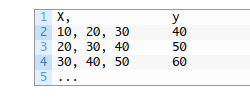

---
- The split_sequence() function below implements this behavior and will split a given univariate sequence into multiple samples where each sample has a specified number of time steps and the output is a single time step.

In [14]:
from numpy import array

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = [], []
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
    
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    
    return array(X), array(y)

---
- We can demonstrate this function on our small contrived dataset above.

In [15]:
# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]

# choose a number of time steps
n_steps = 3

# split into samples
X, y = split_sequence(raw_seq, n_steps)

for i in range(len(X)):
    print(X[i], y[i])

[10 20 30] 40
[20 30 40] 50
[30 40 50] 60
[40 50 60] 70
[50 60 70] 80
[60 70 80] 90


In [16]:
print(X.shape, y.shape)

(6, 3) (6,)


---
- Running the example splits the univariate series into six samples where each sample has three input time steps and one output time step.

---
- Now that we know how to prepare a univariate series for modeling, let’s look at developing LSTM models that can learn the mapping of inputs to outputs, starting with a Vanilla LSTM.

---

#### Vanilla LSTM

---


- A Vanilla LSTM is an LSTM model that has a single hidden layer of LSTM units, and an output layer used to make a prediction.

---
- We can define a Vanilla LSTM for univariate time series forecasting as follows.

In [ ]:
!pip install keras tensorflow

In [ ]:
# from keras.models import Sequential
# from keras.layers import LSTM
# from keras.layers import Dense

# # define model
# model = Sequential()
# model.add(LSTM(50, activation='relu', input_shape = (n_steps, n_features)))
# model.add(Dense(1))
# model.compile(optimizer='adam', loss='mse')

---
- Key in the definition is the shape of the input; that is what the model expects as input for each sample in terms of the number of time steps and the number of features.

---
- We are working with a univariate series, so the number of features is one, for one variable.

---
- The number of time steps as input is the number we chose when preparing our dataset as an argument to the split_sequence() function.

---
- The shape of the input for each sample is specified in the input_shape argument on the definition of first hidden layer.

---
- We almost always have multiple samples, therefore, the model will expect the input component of training data to have the dimensions or shape:
[samples, timesteps, features]

---
- Our split_sequence() function in the previous section outputs the X with the shape [samples, timesteps], so we easily reshape it to have an additional dimension for the one feature.

In [ ]:
# # reshape from [samples, timesteps] into [samples, timesteps, features]
# n_features = 1
# X = X.reshape(X.shape[0], X.shape[1], n_features)

---
- In this case, we define a model with 50 LSTM units in the hidden layer and an output layer that predicts a single numerical value.

---
- The model is fit using the efficient Adam version of stochastic gradient descent and optimized using the mean squared error, or ‘mse‘ loss function.

---
- Once the model is defined, we can fit it on the training dataset.

In [ ]:
# fit model
# model.fit(X, y, epochs = 200, verbose=0)

---
- After the model is fit, we can use it to make a prediction.

---
- We can predict the next value in the sequence by providing the input:
[70, 80, 90]

And expecting the model to predict something like:
[100]

---
- The model expects the input shape to be three-dimensional with [samples, timesteps, features], therefore, we must reshape the single input sample before making the prediction.

In [ ]:
# # demonstrate prediction
# x_input = array([70, 80, 90])
# x_input = x_input.reshape((1, n_steps, n_features))
# yhat = model.predict(x_input, verbose=0)

---
- We can tie all of this together and demonstrate how to develop a Vanilla LSTM for univariate time series forecasting and make a single prediction.

In [8]:
# univariate lstm example

from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = [], []
    for i in range(len(sequence)):
        # find the endof this pattern
        end_ix = i + n_steps

        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        
        # gather input and out parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)

    return array(X), array(y)

# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]

# choose a number of time steps
n_steps = 3

# split into samples
X, y = split_sequence(raw_seq, n_steps)

# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape(X.shape[0], X.shape[1], n_features)

# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# fit model
model.fit(X, y, epochs = 200, verbose=0)

# demonstrate prediction
x_input = array([70, 80, 90])
x_input = x_input.reshape(1, n_steps, n_features)
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[102.51517]]


---
- Running the example prepares the data, fits the model, and makes a prediction.

---
- Note: Your results may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average outcome.

---
#### Stacked LSTM

--- 
- Multiple hidden LSTM layers can be stacked one on top of another in what is referred to as a Stacked LSTM model.

---
- An LSTM layer requires a three-dimensional input and LSTMs by default will produce a two-dimensional output as an interpretation from the end of the sequence.

---
- We can address this by having the LSTM output a value for each time step in the input data by setting the return_sequences=True argument on the layer;
- This allows us to have 3D output from hidden LSTM layer as input to the next.

---
- We can therefore define a Stacked LSTM as follows.

In [ ]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

---
- We can tie this together; the complete code example is listed below.

In [21]:
# univariate stacked lstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

# split a univariate sequence
def split_sequence(sequence, n_steps):
    X, y = [], []
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i+n_steps

        # check if we are beyong the sequence
        if end_ix > len(sequence)-1:
            break

        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)

    return array(X), array(y)
    
# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]

# choose a number of time steps
n_steps = 3

# split int samples
X, y = split_sequence(raw_seq, n_steps)

# reshape from [samples, timesteps] into [samples, timesptes, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

print(X.shape, y.shape)
# define model
model = Sequential()
model.add(LSTM(50, activation ='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# fit model
model.fit(X, y, epochs=200, verbose=0)

# demonstrate prediction
x_input = array([70, 80, 90])
x_input = x_input.reshape(1, n_steps, n_features)
yhat = model.predict(x_input, verbose=0)
print(yhat)

(6, 3, 1) (6,)


/home/brenddon/Documents/uff/mestrado/periodo20251/pesquisa/february/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[[101.90616]]


---
- Note: Your results may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision;
- Consider running the example a few times and compare the average outcome.

---
#### Bidirectional LSTM

---
- On some sequence prediction problems, it can be beneficial to allow the LSTM model to learn the input sequence both forward and backwards and concatenate both interpretations.

---
- This is called a Bidirectional LSTM.

---
- We can implement a Bidirectional LSTM for univariate time series forecasting by wrapping the first hidden layer in a wrapper layer called Bidirectional.

---
- An example of defining a Bidirectional LSTM to read input both forward and backward is as follows.

In [ ]:
# # define model
# model = Sequential()
# model.addn(Bidirectional(LSTM(50, activation='relu'), input_shape(n_steps, n_features)))
# model.add(Dense(1))
# model.compile(optimizer='adam', loss='mse')

---
- The complete example of the Bidirectional LSTM for univariate time series forecasting is listed below.

In [ ]:
# univariate bidirection lstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Bidirectional
from keras.layers import Dense

# split a univariate sequence
def split_sequence(sequence, n_steps):
    X, y = [],[]

    for i in range(len(sequence)):

        end_ix = i + n_steps
        
        if end_ix > len(sequence)-1:
            break

        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
        
    return array(X), array(y)

# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]

# choose a number of time steps
n_steps = 3

# split into samples
X, y = split_sequence(raw_seq, n_steps)

# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

# define model
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# fit model
model.fit(X, y, epochs=200, verbose=0)

# demonstrate prediction
x_input = array([70, 80, 90])
x_input = x_input.reshape(1, n_steps, n_features)
yhat = model.predict(x_input, verbose=0)
print(yhat)


---
- Note: Your results may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average outcome.

---
#### CNN LSTM

---
- A convolutional neural network, or CNN for short, is a type of neural network developed for working with two-dimensional image data.

---
- The CNN can be very effective at automatically extracting and learning features from one-dimensional sequence data such as univariate time series data.

---
- A CNN model can be used in a hybrid model with an LSTM backend where the CNN is used to interpret subsequences of input that together are provided as a sequence to an LSTM model to interpret;
- This hybrid model is called a CNN-LSTM.

---
- The first step is to split the input sequences into subsequences that can be processed by the CNN model;
- For example, we can first split our univariate time series data into input/output samples with four steps as input and one as output;
- Each sample can then be split into two sub-samples, each with two time steps;
- The CNN can interpret each subsequence of two time steps and provide a time series of interpretations of the subsequences to the LSTM model to process as input.

---
- We can parameterize this and define the number of subsequences as n_seq and the number of time steps per subsequence as n_steps;
- The input data can then be reshaped to have the required structure:
[samples, subsequences, timesteps, features]

In [ ]:
# choose a number of time steps
n_steps = 4
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
n_features = 1
n_seq = 2
n_steps = 2
print(X)
X = X.reshape((X.shape[0], n_seq, n_steps, n_features))
print(X)


---
- We want to reuse the same CNN model when reading in each sub-sequence of data separately.

---
- This can be achieved by wrapping the entire CNN model in a TimeDistributed wrapper that will apply the entire model once per input, in this case, once per input subsequence.

---
- The CNN model first has a convolutional layer for reading across the subsequence that requires a number of filters and a kernel size to be specified;
- The number of filters is the number of reads or interpretations of the input sequence;
- The kernel size is the number of time steps included of each ‘read’ operation of the input sequence.
 
 ---
 - The convolution layer is followed by a max pooling layer that distills the filter maps down to 1/2 of their size that includes the most salient features;
 - These structures are then flattened down to a single one-dimensional vector to be used as a single input time step to the LSTM layer.

In [ ]:
# model.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(None, n_steps, n_features)))
# model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
# model.add(TimeDistributed(Flatten()))

---
- Next, we can define the LSTM part of the model that interprets the CNN model’s read of the input sequence and makes a prediction.

In [ ]:
# model.add(LSTM(50, activation='relu'))
# model.add(Dense(1))

---
- We can tie all of this together; the complete example of a CNN-LSTM model for univariate time series forecasting is listed below.

In [22]:
# univariate cnn lstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers import Conv1D
from keras.layers import MaxPooling1D

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = [], []

    for i in range(len(sequence)):
        end_ix = i + n_steps

        if end_ix > len(sequence)-1:
            break

        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)

    return array(X), array(y)

# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]

# choose a number of time steps
n_steps = 4

# split into samples
X, y = split_sequence(raw_seq, n_steps)

# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
n_features = 1
n_seq = 2
n_steps = 2
X = X.reshape((X.shape[0], n_seq, n_steps, n_features))

print(X.shape, y.shape)
# define model
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape = (None, n_steps, n_features)))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# fit model
model.fit(X, y, epochs=500, verbose=0)

# demonstrate prediction
x_input = array([60, 70, 80, 90])
x_input = x_input.reshape((1, n_seq, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

(5, 2, 2, 1) (5,)


/home/brenddon/Documents/uff/mestrado/periodo20251/pesquisa/february/.venv/lib/python3.11/site-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[[100.96615]]


---
#### ConvLSTM

---
- A type of LSTM related to the CNN-LSTM is the ConvLSTM, where the convolutional reading of input is built directly into each LSTM unit.

---
- The layer expects input as a sequence of two-dimensional images, therefore the shape of input data must be:

[samples, timesteps, rows, columns, features]

---
- For our purposes, we can split each sample into subsequences where timesteps will become the number of subsequences, or n_seq, and columns will be the number of time steps for each subsequence, or n_steps;
-  The number of rows is fixed at 1 as we are working with one-dimensional data.

---
- We can now reshape the prepared samples into the required structure.

In [9]:
# chooose a number of time steps
n_steps = 4

# split into samples
X, y = split_sequence(raw_seq, n_steps)

# reshape from [samples, timesteps] into [samples, timesteps, rows, columns, features]
n_features = 1
n_seq =2 
n_steps =2
X = X.reshape((X.shape[0], n_seq, 1, n_steps, n_features))

---
- We can now reshape the prepared samples into the required structure;
- As we are working with a one-dimensional series, the number of rows is always fixed to 1 in the kernel.

---
- The output of the model must then be flattened before it can be interpreted and a prediction made.

In [11]:
# model.add(ConvLSTM(filters=64, kernel_size=(1,2),activation = 'relu', input_shape=(n_seq, 1, n_steps, n_features)))
# model.add(Flatten())

---
- The complete example of a ConvLSTM for one-step univariate time series forecasting is listed below.

In [24]:
# univariate convlstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import ConvLSTM2D

# slplit a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = [], []

    for i in range(len(sequence)):
        end_ix = i + n_steps   
        if end_ix > len(sequence)-1:
            break

        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]

# choose a number of time steps
n_steps = 4

# split into samples
X, y = split_sequence(raw_seq, n_steps)


# reshape from [samples, timesteps] into [samples, timesteps, rows, columns, features]
n_features =1
n_steps =2
n_seq = 2

X = X.reshape((X.shape[0], n_seq, 1, n_steps, n_features))
print(X.shape, y.shape)

# define model
model = Sequential()
model.add(ConvLSTM2D(filters=64, kernel_size=(1,2), activation='relu', input_shape=(n_seq, 1, n_steps, n_features)))
model.add(Flatten())
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# fit model
model.fit(X, y , epochs=500, verbose=0)

# demonstrate prediction
x_input = array([60, 70, 80,90])
x_input = x_input.reshape((1, n_seq,1,  n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)


(5, 2, 1, 2, 1) (5,)
[[100.5625]]


In [13]:
x_input = array([60, 70, 80,90])
print(x_input)
x_input = x_input.reshape((1, n_seq, n_steps, n_features))
print(x_input)

[60 70 80 90]
[[[[60]
   [70]]

  [[80]
   [90]]]]


---
- Now that we have looked at LSTM models for univariate data, let’s turn our attention to multivariate data.

### Multivariate LSTM Models

---
- Multivariate time series data means data where there is more than one observation for each time step.

---
- There are two main models that we may require with multivariate time series data; they are:
1. Multiple Input Series;
2. Multiple Parallel Series.

Let’s take a look at each in turn.

---
#### Multiple Input Series

---
- A problem may have two or more parallel input time series and an output time series that is dependent on the input time series.

---
- The input time series are parallel because each series has an observation at the same time steps.

--- 
- We can demonstrate this with a simple example of two parallel input time series where the output series is the simple addition of the input series.

In [9]:
from numpy import array
# define input sequence
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = array([in_seq1[i]+in_seq2[i] for i in range(len(in_seq1))])

---
- We can reshape these three arrays of data as a single dataset where each row is a time step, and each column is a separate time series;
- This is a standard way of storing parallel time series in a CSV file.

In [10]:
from numpy import hstack
# convert to [rows, coloumns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))

# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))

---
- The complete example is listed below.

In [12]:
# multivariate data preparation
from numpy import array
from numpy import hstack
# define input sequence
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = array([in_seq1[i]+in_seq2[i] for i in range(len(in_seq1))])
# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))

---
- Running the example prints the dataset with one row per time step and one column for each of the two input and one output parallel time series.

---
- As with the univariate time series, we must structure these data into samples with input and output elements.

---
- An LSTM model needs sufficient context to learn a mapping from an input sequence to an output value;
- LSTMs can support parallel input time series as separate variables or features;
- Therefore, we need to split the data into samples maintaining the order of observations across the two input sequences.

---
- If we chose three input time steps, then the first sample would look as follows:


![Screenshot From 2025-02-19 23-52-08.png](<attachment:Screenshot From 2025-02-19 23-52-08.png>)
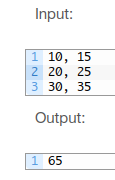

---
- That is, the first three time steps of each parallel series are provided as input to the model and the model associates this with the value in the output series at the third time step, in this case, 65.

---
- We can see that, in transforming the time series into input/output samples to train the model, that we will have to discard some values from the output time series where we do not have values in the input time series at prior time steps;
- In turn, the choice of the size of the number of input time steps will have an important effect on how much of the training data is used.

---
- We can define a function named split_sequences() that will take a dataset as we have defined it with rows for time steps and columns for parallel series and return input/output samples.

In [ ]:
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
    X, y = [], []
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        
        # check if we are beyond the dataset
        if end_ix > len(sequence):
            break
        
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix, :-1], sequence[end_ix-1, -1]
        X.append(seq_x)
        y.append(seq_y)
    
    return array(X), array(y)

---
- We can test this function on our dataset using three time steps for each input time series as input.

---
- The complete example is listed below.

In [22]:
# multivariate data preparation
from numpy import array
from numpy import hstack

# split a multivariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = [], []

    for i in range(len(sequence)):
        end_ix = i + n_steps

        # if end_ix > len(sequence):
        if end_ix > len(sequence):
            break
        seq_x, seq_y = sequence[i:end_ix, :-1], sequence[end_ix -1, -1]
        X.append(seq_x)
        y.append(seq_y)

    return array(X), array(y)

# define input sequence
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = array([in_seq1[i]+in_seq2[i] for i in range(len(in_seq1))])

# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))

# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))

# choose a number of time steps
n_steps = 3

# convert into input/output
X, y = split_sequence(dataset, n_steps)

print(X.shape, y.shape)

# summarize the data
for i in range(len(X)):
    print(X[i], y[i])

(7, 3, 2) (7,)
[[10 15]
 [20 25]
 [30 35]] 65
[[20 25]
 [30 35]
 [40 45]] 85
[[30 35]
 [40 45]
 [50 55]] 105
[[40 45]
 [50 55]
 [60 65]] 125
[[50 55]
 [60 65]
 [70 75]] 145
[[60 65]
 [70 75]
 [80 85]] 165
[[70 75]
 [80 85]
 [90 95]] 185


In [2]:
# multivariate data preparation
from numpy import array
from numpy import hstack

# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

# define input sequence
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = array([in_seq1[i]+in_seq2[i] for i in range(len(in_seq1))])
# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))
# choose a number of time steps
n_steps = 3
# convert into input/output
X, y = split_sequences(dataset, n_steps)
print(X.shape, y.shape)
# summarize the data
for i in range(len(X)):
	print(X[i], y[i])

(7, 3, 2) (7,)
[[10 15]
 [20 25]
 [30 35]] 65
[[20 25]
 [30 35]
 [40 45]] 85
[[30 35]
 [40 45]
 [50 55]] 105
[[40 45]
 [50 55]
 [60 65]] 125
[[50 55]
 [60 65]
 [70 75]] 145
[[60 65]
 [70 75]
 [80 85]] 165
[[70 75]
 [80 85]
 [90 95]] 185


---
- We are now ready to fit an LSTM model on this data.

---
- Any of the varieties of LSTMs in the previous section can be used, such as a Vanilla, Stacked, Bidirectional, CNN, or ConvLSTM model.

---
- We will use a Vanilla LSTM where the number of time steps and parallel series (features) are specified for the input layer via the input_shape argument.

---
- 

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

n_features = X.shape[2]

# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

2025-02-20 10:44:51.379160: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/home/brenddon/Documents/uff/mestrado/periodo20251/pesquisa/february/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


---
- When making a prediction, the model expects three time steps for two input time series.

---
- We can predict the next value in the output series providing the input values of:

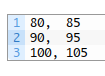

---
- The shape of the one sample with three time steps and two variables must be [1, 3, 2].

---
- We would expect the next value in the sequence to be 100 + 105, or 205.

In [15]:
# demonstrate prediction
x_input = array([[80, 85], [90, 95], [100, 105]])
print(x_input)
print(x_input.shape)
x_input = x_input.reshape((1, n_steps, n_features))
print(x_input)
print(x_input.shape)
yhat = model.predict(x_input, verbose=0)

[[ 80  85]
 [ 90  95]
 [100 105]]
(3, 2)
[[[ 80  85]
  [ 90  95]
  [100 105]]]
(1, 3, 2)


---
- The complete example is listed below.

In [17]:
# multivariate lstm example
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

# split a multivariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = [], []

    for i in range(len(sequence)):
        end_ix = i + n_steps

        if end_ix > len(sequence):
            break

        seq_x, seq_y = sequence[i:end_ix, :-1], sequence[end_ix-1, -1]
        X.append(seq_x)
        y.append(seq_y)

    return array(X), array(y)

# define input sequence
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = array([in_seq1[i] + in_seq2[i] for i in range(len(in_seq1))])

# convert to [rows, columns] scructure
in_seq1 = in_seq1.reshape((len(in_seq1),1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))

# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))

# choose a number of time steps
n_steps = 3

# convert into input/outpu
X, y = split_sequence(dataset, n_steps)

# the dataset knows the number of features, e.g. 2
n_features = X.shape[2]

# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# fit model
model.fit(X, y, epochs=200, verbose=0)

# demonstrate the prediction
x_input = array([[80, 85], [90, 95], [100, 105]])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

/home/brenddon/Documents/uff/mestrado/periodo20251/pesquisa/february/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[[206.39905]]


---
#### Multiple Parallel Series

---
- An alternate time series problem is the case where there are multiple parallel time series and a value must be predicted for each.

---
- For example, given the data from the previous section:

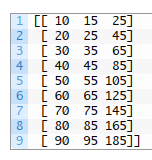

---
- We may want to predict the value for each of the three time series for the next time step.

---
- This might be referred to as multivariate forecasting.

---
- Again, the data must be split into input/output samples in order to train a model.

---
- The first sample of this dataset would be:

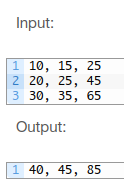

---
- The split_sequences() function below will split multiple parallel time series with rows for time steps and one series per column into the required input/output shape.

In [31]:
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
    X, y = [], []

    for i in range(len(sequences)):
        end_ix = i+n_steps

        if end_ix > len(sequences)-1:
            break

        seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix, :]
        X.append(seq_x)
        y.append(seq_y)

    return array(X), array(y)

---
- We can demonstrate this on the contrived problem; the complete example is listed below.

In [32]:
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
    X, y = [], []

    for i in range(len(sequences)):
        end_ix = i+n_steps

        if end_ix > len(sequences)-1:
            break

        seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix, :]
        X.append(seq_x)
        y.append(seq_y)

    return array(X), array(y)

# define input sequence
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = array([in_seq1[i] + in_seq2[i] for i in range(len(in_seq1))])

# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))

# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))

# choose the number of time steps
n_steps = 3

# convert into input/output
X,y = split_sequences(dataset, n_steps)
print(X.shape, y.shape)

# summarize the data
for i in range(len(X)):
    print(X[i], y[i])

(6, 3, 3) (6, 3)
[[10 15 25]
 [20 25 45]
 [30 35 65]] [40 45 85]
[[20 25 45]
 [30 35 65]
 [40 45 85]] [ 50  55 105]
[[ 30  35  65]
 [ 40  45  85]
 [ 50  55 105]] [ 60  65 125]
[[ 40  45  85]
 [ 50  55 105]
 [ 60  65 125]] [ 70  75 145]
[[ 50  55 105]
 [ 60  65 125]
 [ 70  75 145]] [ 80  85 165]
[[ 60  65 125]
 [ 70  75 145]
 [ 80  85 165]] [ 90  95 185]


---
- The shape of X is three-dimensional, including the number of samples (6), the number of time steps chosen per sample (3), and the number of parallel time series or features (3).

---
- The shape of y is two-dimensional as we might expect for the number of samples (6) and the number of time variables per sample to be predicted (3).

---
- The data is ready to use in an LSTM model that expects three-dimensional input and two-dimensional output shapes for the X and y components of each sample.

---
- We are now ready to fit an LSTM model on this data.

---
- Any of the varieties of LSTMs in the previous section can be used, such as a Vanilla, Stacked, Bidirectional, CNN, or ConvLSTM model.

---
- We will use a Stacked LSTM where the number of time steps and parallel series (features) are specified for the input layer via the input_shape argument;
- The number of parallel series is also used in the specification of the number of values to predict by the model in the output layer; again, this is three.

In [36]:
n_features = 3
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(100, activation='relu'))
model.add(Dense(n_features))
model.compile(optimizer='adam', loss='mse')

---
- We can predict the next value in each of the three parallel series by providing an input of three time steps for each series.

---
- The shape of the input for making a single prediction must be 1 sample, 3 time steps, and 3 features, or [1, 3, 3]

In [37]:
# demonstrate prediction
x_input = array([[70, 75, 145], [80, 85, 165], [90, 95, 185]])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)

---
- We would expect the vector output to be: [100, 105, 205]

---
- We can tie all of this together and demonstrate a Stacked LSTM for multivariate output time series forecasting below.

In [43]:
# multivariate output stacked lstm example
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
    X, y = [], []

    for i in range(len(sequences)):
        end_ix = i + n_steps
        
        if end_ix > len(sequences)-1:
            break

        seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix, :]
        X.append(seq_x)
        y.append(seq_y)

    return array(X), array(y)

in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = array([in_seq1[i]+in_seq2[i] for i in range(len(in_seq1))])

# convert to [rows, columns]
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))

# horizontaly stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))

# choose a number of time steps
n_steps = 3

# convert into input/output
X, y = split_sequences(dataset, n_steps)

# the dataset knows the number of features
n_features = X.shape[2]

# define model
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(100, activation='relu'))
model.add(Dense(n_features))
model.compile(optimizer='adam', loss='mse')

# fit model
model.fit(X, y, epochs=400, verbose=0)

# demonstrate predict
x_input = array([[70,75,145], [80,85,165], [90,95,185]])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[ 99.301094 105.75539  205.53156 ]]


---
### Multi-Step LSTM Models

---
- A time series forecasting problem that requires a prediction of multiple time steps into the future can be referred to as multi-step time series forecasting.

---
- Specifically, these are problems where the forecast horizon or interval is more than one time step.

---
- There are two main types of LSTM models that can be used for multi-step forecasting; they are:
1. Vector Output Model;
2. Encoder-Decoder Model

---
- Before we look at these models, let’s first look at the preparation of data for multi-step forecasting.

---
#### Data Preparation

---
- As with one-step forecasting, a time series used for multi-step time series forecasting must be split into samples with input and output components.

---
- Both the input and output components will be comprised of multiple time steps and may or may not have the same number of steps.

---
- For example, given the univariate time series:

[10, 20, 30, 40, 50, 60, 70, 80, 90]

---
- We could use the last three time steps as input and forecast the next two time steps.

---
- The first sample would look as follows:

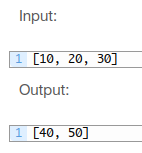

---
- The split_sequence() function below implements this behavior and will split a given univariate time series into samples with a specified number of input and output time steps.

In [2]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps_in, n_steps_out):
    X, y = [], []
    for i in range(len(sequence)):
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        if out_end_ix > len(sequence):
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
    
    return array(X), array(y)

---
- We can demonstrate this function on the small contrived dataset.

---
- The complete example is listed below.

In [3]:
# multi-step data preparation
from numpy import array

def split_sequence(sequence, n_steps_in, n_steps_out):
    X, y = [], []
    for i in range(len(sequence)):
        end_ix = i+ n_steps_in
        out_end_ix = end_ix + n_steps_out
        if out_end_ix > len(sequence):
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)

    return array(X), array(y)

# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]

# choose a number of time steps
n_steps_in, n_steps_out = 3,2

# split into samples
X, y = split_sequence(raw_seq, n_steps_in, n_steps_out)

for i in range(len(X)):
    print(X[i], y[i])

[10 20 30] [40 50]
[20 30 40] [50 60]
[30 40 50] [60 70]
[40 50 60] [70 80]
[50 60 70] [80 90]


---
- Now that we know how to prepare data for multi-step forecasting, let’s look at some LSTM models that can learn this mapping.

---
#### Vector Output Model

---
- This approach was seen in the previous section were one time step of each output time series was forecasted as a vector.

---
- As with the LSTMs for univariate data in a prior section, the prepared samples must first be reshaped;
- The LSTM expects data to have a three-dimensional structure of [samples, timesteps, features], and in this case, we only have one feature so the reshape is straightforward.

In [ ]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X= X.reshape((X.shape[0], X.shape[1], n_features))

---
- With the number of input and output steps specified in the n_steps_in and n_steps_out variables, we can define a multi-step time-series forecasting model.

---
- Any of the presented LSTM model types could be used, such as Vanilla, Stacked, Bidirectional, CNN-LSTM, or ConvLSTM. Below defines a Stacked LSTM for multi-step forecasting.

In [ ]:
# define model
n_steps = 3
n_features = 1
n_steps_out = 2
model = Sequential()
model.append(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps,n_features)))
model.append(LSTM(100, activation='relu'))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mse')

---
- The model can make a prediction for a single sample. We can predict the next two steps beyond the end of the dataset by providing the input: 

[70, 80, 90]

- We would expect the predicted output to be:

[100, 110]

---
- As expected by the model, the shape of the single sample of input data when making the prediction must be [1, 3, 1] for the 1 sample, 3 time steps of the input, and the single feature.


In [ ]:
# demonstrate prediction
x_input = array([70, 80, 90])
x_input = x_input.reshape(1, n_steps_in, n_features)
yhat = model.predict(x_input, verbose=0)

---
- Tying all of this together, the Stacked LSTM for multi-step forecasting with a univariate time series is listed below.

In [11]:
# univariate multi-step vector-output stacked lstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

# split a univariate sequence into samples
def split_sequence(sequences, n_steps_in, n_steps_out):
    X, y = [],[]
    for i in range(len(sequences)):
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        if out_end_ix > len(sequences):
            break
        seq_x, seq_y = sequences[i:end_ix], sequences[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)

    return array(X), array(y)

# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]

# choose a number for steps_in and n_steps_out
n_steps_in = 3
n_steps_out = 2

# split into samples
X, y = split_sequence(raw_seq, n_steps_in, n_steps_out)

# reshape from [samples, timesteps] into [samples, timestep, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

# define model
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
model.add(LSTM(100, activation='relu'))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mse')

# fit model
model.fit(X, y, epochs=200, verbose=0)

# test 
x_input = array([70, 80, 90])
x_input = x_input.reshape(1, n_steps_in, n_features)
yhat = model.predict(x_input, verbose=0)
print(yhat)

/home/brenddon/Documents/uff/mestrado/periodo20251/pesquisa/february/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[[107.63507 121.71855]]


---
#### Encoder-Decoder Model

---
- A model specifically developed for forecasting variable length output sequences is called the Encoder-Decoder LSTM.

---
- The model was designed for prediction problems where there are both input and output sequences, so-called sequence-to-sequence, or seq2seq problems, such as translating text from one language to another.

---
- This model can be used for multi-step time series forecasting.

---
- As its name suggests, the model is comprised of two sub-models: the encoder and the decoder.

---
- The encoder is a model responsible for reading and interpreting the input sequence;
- The output of the encoder is a fixed length vector that represents the model’s interpretation of the sequence;
- The encoder is traditionally a Vanilla LSTM model, although other encoder models can be used such as Stacked, Bidirectional, and CNN models.

In [ ]:
model.add(LSTM(100, activation='relu', input_shape=(n_steps_in, n_features)))

---
- The decoder uses the output of the encoder as an input.

---
- First, the fixed-length output of the encoder is repeated, once for each required time step in the output sequence.

In [ ]:
from keras.layers import RepeatVector
model.add(RepeatVector(n_steps_out))

---
- This sequence is then provided to an LSTM decoder model;
- The model must output a value for each value in the output time step, which can be interpreted by a single output model.

In [ ]:
model.add(LSTM(100, activation='relu', return_sequences=True))

---
- We can use the same output layer or layers to make each one-step prediction in the output sequence;
- This can be achieved by wrapping the output part of the model in a TimeDistributed wrapper.

In [ ]:
model.add(TimeDistributed(Dense(1)))

---
- The full definition for an Encoder-Decoder model for multi-step time series forecasting is listed below.

In [ ]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_steps_in, n_features)))
model.add(RepeatVector(n_steps_out))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(1)))
model.compile(optimizer='adam', loss='mse')

---
- As with other LSTM models, the input data must be reshaped into the expected three-dimensional shape of [samples, timesteps, features].

In [ ]:
X = X.reshape((X.shape[0], X.shape[1], n_features))

---
- In the case of the Encoder-Decoder model, the output, or y part, of the training dataset must also have this shape;
- This is because the model will predict a given number of time steps with a given number of features for each input sample.

In [ ]:
y = y.reshape((y.shape[0], y.shape[1], n_features))

---
- The complete example of an Encoder-Decoder LSTM for multi-step time series forecasting is listed below.

In [23]:
# univariate multi-step encoder-decoder lstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import TimeDistributed
from keras.layers import RepeatVector

# split a univariate sequence into samples
def split_sequence(sequence, n_steps_in, n_steps_out):
    X, y = [], []
    for i in range(len(sequence)):
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        if out_end_ix > len(sequence):
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)

    return array(X), array(y)

# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]

# choose the number of time steps
n_steps_in, n_steps_out = 3, 2

# split sequente into samples 
X, y = split_sequence(raw_seq, n_steps_in, n_steps_out)


# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features =1
X = X.reshape((X.shape[0], X.shape[1], n_features))
y = y.reshape((y.shape[0], y.shape[1], n_features))

# deiine model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_steps_in, n_features)))
model.add(RepeatVector(n_steps_out))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(1)))
model.compile(optimizer='adam', loss='mse')

# fit model
model.fit(X, y, epochs = 200, verbose=0)

# demonstrate predict
x_input = array([70, 80, 90])
x_input = x_input.reshape(1, n_steps_in, n_features)
yhat = model.predict(x_input, verbose=0)
print(yhat)



/home/brenddon/Documents/uff/mestrado/periodo20251/pesquisa/february/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[[[103.88692 ]
  [114.006584]]]


---
### Multivariate Multi-Step LSTM Models

---
- In the previous sections, we have looked at univariate, multivariate, and multi-step time series forecasting.

---
- It is possible to mix and match the different types of LSTM models presented so far for the different problems;
- This too applies to time series forecasting problems that involve multivariate and multi-step forecasting, but it may be a little more challenging.

---
- In this section, we will provide short examples of data preparation and modeling for multivariate multi-step time series forecasting as a template to ease this challenge, specifically:

1. Multiple Input Multi-Step Output.
2. Multiple Parallel Input and Multi-Step Output.

---
- Perhaps the biggest stumbling block is in the preparation of data, so this is where we will focus our attention.

---
#### Multiple Input Multi-Step Output

---
- There are those multivariate time series forecasting problems where the output series is separate but dependent upon the input time series, and multiple time steps are required for the output series.

---
- For example, consider our multivariate time series from a prior section:

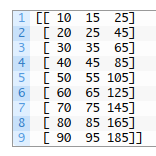

---
- We may use three prior time steps of each of the two input time series to predict two time steps of the output time series.

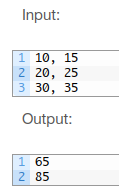

---
- The split_sequences() function below implements this behavior.


In [1]:
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out):
    X, y = [], []
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out-1

        if out_end_ix > len(sequences):
            break

        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1:out_end_ix, -1]
        X.append(seq_x)
        y.append(seq_y)

    return array(X), array(y)

---
- We can demonstrate this on our contrived dataset.

---
- The complete example is listed below.

In [3]:
# multivariate multi-step data preparation
from numpy import array
from numpy import hstack

# split into multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out):
    X, y = [], []

    for i in range(len(sequences)):
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out -1

        if out_end_ix > len(sequences):
            break

        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix -1: out_end_ix, -1]

        X.append(seq_x)
        y.append(seq_y)

    return array(X), array(y)

# define input sequence
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = array([in_seq1[i]+in_seq2[i] for i in range(len(in_seq1))])

# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2),1))
out_seq = out_seq.reshape((len(out_seq), 1))

# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))

# choose a number of time steps
n_steps_in, n_steps_out = 3, 2

# convert into input/output
X, y = split_sequences(dataset, n_steps_in, n_steps_out)
print(X.shape, y.shape)

for i in range(len(X)):
    print(X[i], y[i])


(6, 3, 2) (6, 2)
[[10 15]
 [20 25]
 [30 35]] [65 85]
[[20 25]
 [30 35]
 [40 45]] [ 85 105]
[[30 35]
 [40 45]
 [50 55]] [105 125]
[[40 45]
 [50 55]
 [60 65]] [125 145]
[[50 55]
 [60 65]
 [70 75]] [145 165]
[[60 65]
 [70 75]
 [80 85]] [165 185]


---
- We can see that the shape of the input portion of the samples is three-dimensional, comprised of six samples, with three time steps, and two variables for the 2 input time series.

---
- The output portion of the samples is two-dimensional for the six samples and the two time steps for each sample to be predicted.

---
- We can now develop an LSTM model for multi-step predictions.

---
- A vector output or an encoder-decoder model could be used. In this case, we will demonstrate a vector output with a Stacked LSTM.

---
- The complete example is listed below.

In [4]:
# multivariate multi-step stacked lstm example
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

# split a multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out-1
		# check if we are beyond the dataset
		if out_end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1:out_end_ix, -1]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

# define input sequence
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = array([in_seq1[i]+in_seq2[i] for i in range(len(in_seq1))])
# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))
# choose a number of time steps
n_steps_in, n_steps_out = 3, 2
# covert into input/output
X, y = split_sequences(dataset, n_steps_in, n_steps_out)
# the dataset knows the number of features, e.g. 2
n_features = X.shape[2]
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
model.add(LSTM(100, activation='relu'))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=200, verbose=0)
# demonstrate prediction
x_input = array([[70, 75], [80, 85], [90, 95]])
x_input = x_input.reshape((1, n_steps_in, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

2025-02-25 10:39:43.923464: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-25 10:39:43.926250: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-25 10:39:43.935425: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1740490783.950794   16567 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1740490783.955442   16567 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-25 10:39:43.971633: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

[[186.62573 207.56308]]


---
- Running the example fits the model and predicts the next two time steps of the output sequence beyond the dataset.

---
- We would expect the next two steps to be: [185, 205]

---
- It is a challenging framing of the problem with very little data, and the arbitrarily configured version of the model gets close.

---
#### Multiple Parallel Input and Multi-Step Output

---
- A problem with parallel time series may require the prediction of multiple time steps of each time series.

---
- For example, consider our multivariate time series from a prior section:

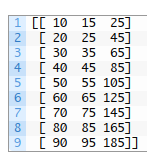

---
- We may use the last three time steps from each of the three time series as input to the model and predict the next time steps of each of the three time series as output.

---
- The first sample in the training dataset would be the following.

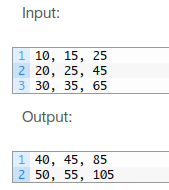

---
- The split_sequences() function below implements this behavior.

In [5]:
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out
		# check if we are beyond the dataset
		if out_end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix:out_end_ix, :]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

---
- We can demonstrate this function on the small contrived dataset.

---
- The complete example is listed below.

In [6]:
# multivariate multi-step data preparation
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed

# split a multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out
		# check if we are beyond the dataset
		if out_end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix:out_end_ix, :]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

# define input sequence
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = array([in_seq1[i]+in_seq2[i] for i in range(len(in_seq1))])
# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))
# choose a number of time steps
n_steps_in, n_steps_out = 3, 2
# covert into input/output
X, y = split_sequences(dataset, n_steps_in, n_steps_out)
print(X.shape, y.shape)
# summarize the data
for i in range(len(X)):
	print(X[i], y[i])

(5, 3, 3) (5, 2, 3)
[[10 15 25]
 [20 25 45]
 [30 35 65]] [[ 40  45  85]
 [ 50  55 105]]
[[20 25 45]
 [30 35 65]
 [40 45 85]] [[ 50  55 105]
 [ 60  65 125]]
[[ 30  35  65]
 [ 40  45  85]
 [ 50  55 105]] [[ 60  65 125]
 [ 70  75 145]]
[[ 40  45  85]
 [ 50  55 105]
 [ 60  65 125]] [[ 70  75 145]
 [ 80  85 165]]
[[ 50  55 105]
 [ 60  65 125]
 [ 70  75 145]] [[ 80  85 165]
 [ 90  95 185]]


---
- Running the example first prints the shape of the prepared training dataset.

---
- We can see that both the input (X) and output (Y) elements of the dataset are three dimensional for the number of samples, time steps, and variables or parallel time series respectively.

---
- The input and output elements of each series are then printed side by side so that we can confirm that the data was prepared as we expected.

---
- We can use either the Vector Output or Encoder-Decoder LSTM to model this problem. In this case, we will use the Encoder-Decoder model.

---
- The complete example is listed below.

In [10]:
# multivariate multi-step encoder-decoder lstm example
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed

# split a multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out
		# check if we are beyond the dataset
		if out_end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix:out_end_ix, :]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

# define input sequence
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = array([in_seq1[i]+in_seq2[i] for i in range(len(in_seq1))])
# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))
# choose a number of time steps
n_steps_in, n_steps_out = 3, 2
# covert into input/output
X, y = split_sequences(dataset, n_steps_in, n_steps_out)
# the dataset knows the number of features, e.g. 2
n_features = X.shape[2]
# define model
model = Sequential()
model.add(LSTM(200, activation='relu', input_shape=(n_steps_in, n_features)))
model.add(RepeatVector(n_steps_out))
model.add(LSTM(200, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(n_features)))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=300, verbose=0)
# demonstrate prediction
x_input = array([[60, 65, 125], [70, 75, 145], [80, 85, 165]])
x_input = x_input.reshape((1, n_steps_in, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

/home/brenddon/Documents/uff/mestrado/periodo20251/pesquisa/february/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[[[ 90.72586   96.121666 186.96873 ]
  [101.60779  106.58153  208.10207 ]]]


---
- Running the example fits the model and predicts the values for each of the three time steps for the next two time steps beyond the end of the dataset.

---
- We would expect the values for these series and time steps to be as follows:

90, 95, 185

100, 105, 205

---
- We can see that the model forecast gets reasonably close to the expected values.

---
## Time Series Prediction with LSTM Recurrent Neural Networks in Python with Keras

Ref: [https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/](https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/)

/home/brenddon/Documents/uff/mestrado/periodo20251/pesquisa/february/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Train Score: 22.77 RMSE
Test Score: 49.53 RMSE


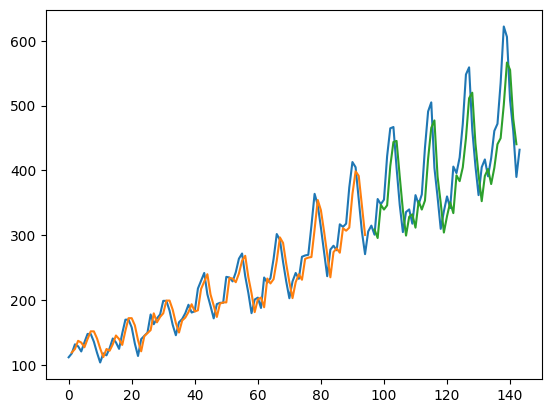

In [20]:
# LSTM for international airline passengers problem with regression framing
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)
# fix random seed for reproducibility
tf.random.set_seed(7)
# load the dataset
dataframe = read_csv('./data/airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=0)
# make predictions
trainPredict = model.predict(trainX,verbose=0)
testPredict = model.predict(testX, verbose=0)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()